# Exploration

In [7]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

## Load data

In [8]:
data = xr.open_dataset("../data/delhi_cpcb_2022.nc")
data

<xarray.Dataset>
Dimensions:    (station: 40, time: 8783)
Coordinates:
  * station    (station) object 'Alipur, Delhi - DPCC' ... 'Wazirpur, Delhi -...
  * time       (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-01-01T22:23:30
    latitude   (station) float64 ...
    longitude  (station) float64 ...
Data variables: (12/21)
    From Date  (station, time) datetime64[ns] ...
    To Date    (station, time) datetime64[ns] ...
    PM2.5      (station, time) float64 ...
    PM10       (station, time) float64 ...
    NO         (station, time) float64 ...
    NO2        (station, time) float64 ...
    ...         ...
    WD         (station, time) float64 ...
    SR         (station, time) float64 ...
    BP         (station, time) float64 ...
    AT         (station, time) float64 ...
    RF         (station, time) float64 ...
    TOT-RF     (station, time) float64 ...

In [9]:
df = data.to_dataframe().reset_index().set_index("time")
df = df.loc["2022"]

In [10]:
df.columns

Index(['station', 'From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS', 'WD',
       'SR', 'BP', 'AT', 'RF', 'TOT-RF', 'latitude', 'longitude'],
      dtype='object')

In [11]:
df = df.rename(columns={"RH": "relative_humidity", "WS": "wind_speed", "WD": "wind_direction", "SR": "solar_radiation", "BP": "pressure", "AT": "temperature", "RF": "rain_fall", "TOT-RF": "total_rainfall"})
df.columns

Index(['station', 'From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'relative_humidity',
       'wind_speed', 'wind_direction', 'solar_radiation', 'pressure',
       'temperature', 'rain_fall', 'total_rainfall', 'latitude', 'longitude'],
      dtype='object')

## Statistics

### Stations

In [12]:
df.station.unique().tolist()

['Alipur, Delhi - DPCC',
 'Anand Vihar, Delhi - DPCC',
 'Ashok Vihar, Delhi - DPCC',
 'Aya Nagar, Delhi - IMD',
 'Bawana, Delhi - DPCC',
 'Burari Crossing, Delhi - IMD',
 'CRRI Mathura Road, Delhi - IMD',
 'Chandni Chowk, Delhi - IITM',
 'DTU, Delhi - CPCB',
 'Dr. Karni Singh Shooting Range, Delhi - DPCC',
 'Dwarka-Sector 8, Delhi - DPCC ',
 'East Arjun Nagar, Delhi - CPCB',
 'IGI Airport (T3), Delhi - IMD',
 'IHBAS, Dilshad Garden, Delhi - CPCB',
 'ITO, Delhi - CPCB',
 'Jahangirpuri, Delhi - DPCC',
 'Jawaharlal Nehru Stadium, Delhi - DPCC',
 'Lodhi Road, Delhi - IITM',
 'Lodhi Road, Delhi - IMD',
 'Major Dhyan Chand National Stadium, Delhi - DPCC',
 'Mandir Marg, Delhi - DPCC',
 'Mundka, Delhi - DPCC',
 'NSIT Dwarka, Delhi - CPCB',
 'Najafgarh, Delhi - DPCC',
 'Narela, Delhi - DPCC',
 'Nehru Nagar, Delhi - DPCC',
 'North Campus, DU, Delhi - IMD',
 'Okhla Phase-2, Delhi - DPCC',
 'Patparganj, Delhi - DPCC',
 'Punjabi Bagh, Delhi - DPCC',
 'Pusa, Delhi - DPCC',
 'Pusa, Delhi - IMD',
 'R

### Number of stations

In [13]:
df.station.unique().size

40

### Number of measurements per station

In [14]:
num_points_per_station = df.station.value_counts()[0]
assert num_points_per_station == 24 * 365  # hourly data for a year

### Fraction of valid PM2.5 measurements per station

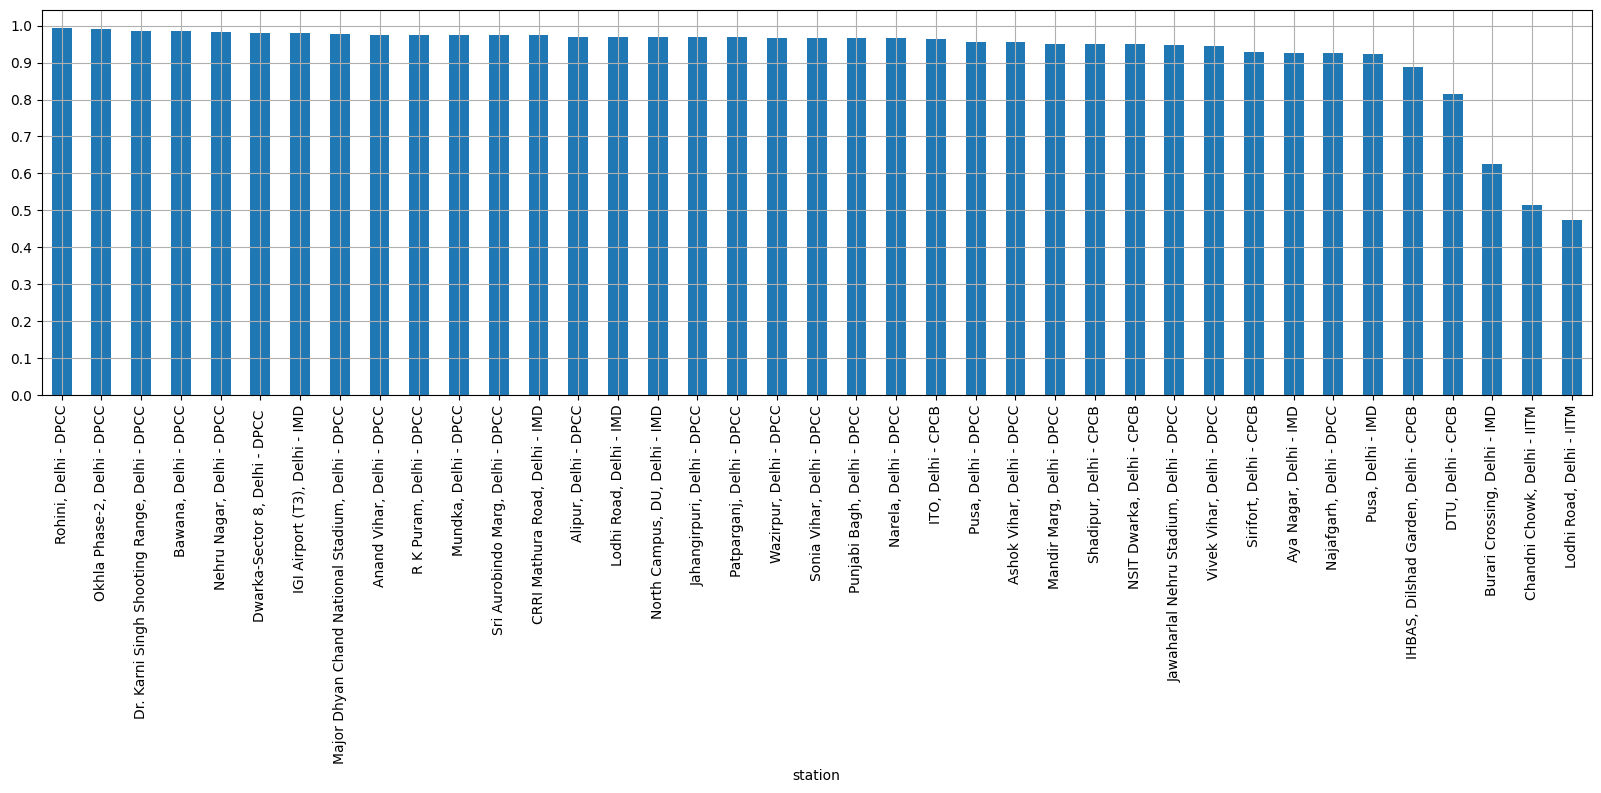

In [15]:
fraction_of_pm25_data = df.dropna(subset="PM2.5").station.value_counts()/num_points_per_station
fraction_of_pm25_data.plot(kind="bar", figsize=(20, 5), grid=True, yticks=np.arange(0, 1.1, 0.1));

In [21]:
fraction_of_pm25_data.index[-5:].tolist()

['IHBAS, Dilshad Garden, Delhi - CPCB',
 'DTU, Delhi - CPCB',
 'Burari Crossing, Delhi - IMD',
 'Chandni Chowk, Delhi - IITM',
 'Lodhi Road, Delhi - IITM']

### Fraction of valid meteorological + PM2.5 measurements per station

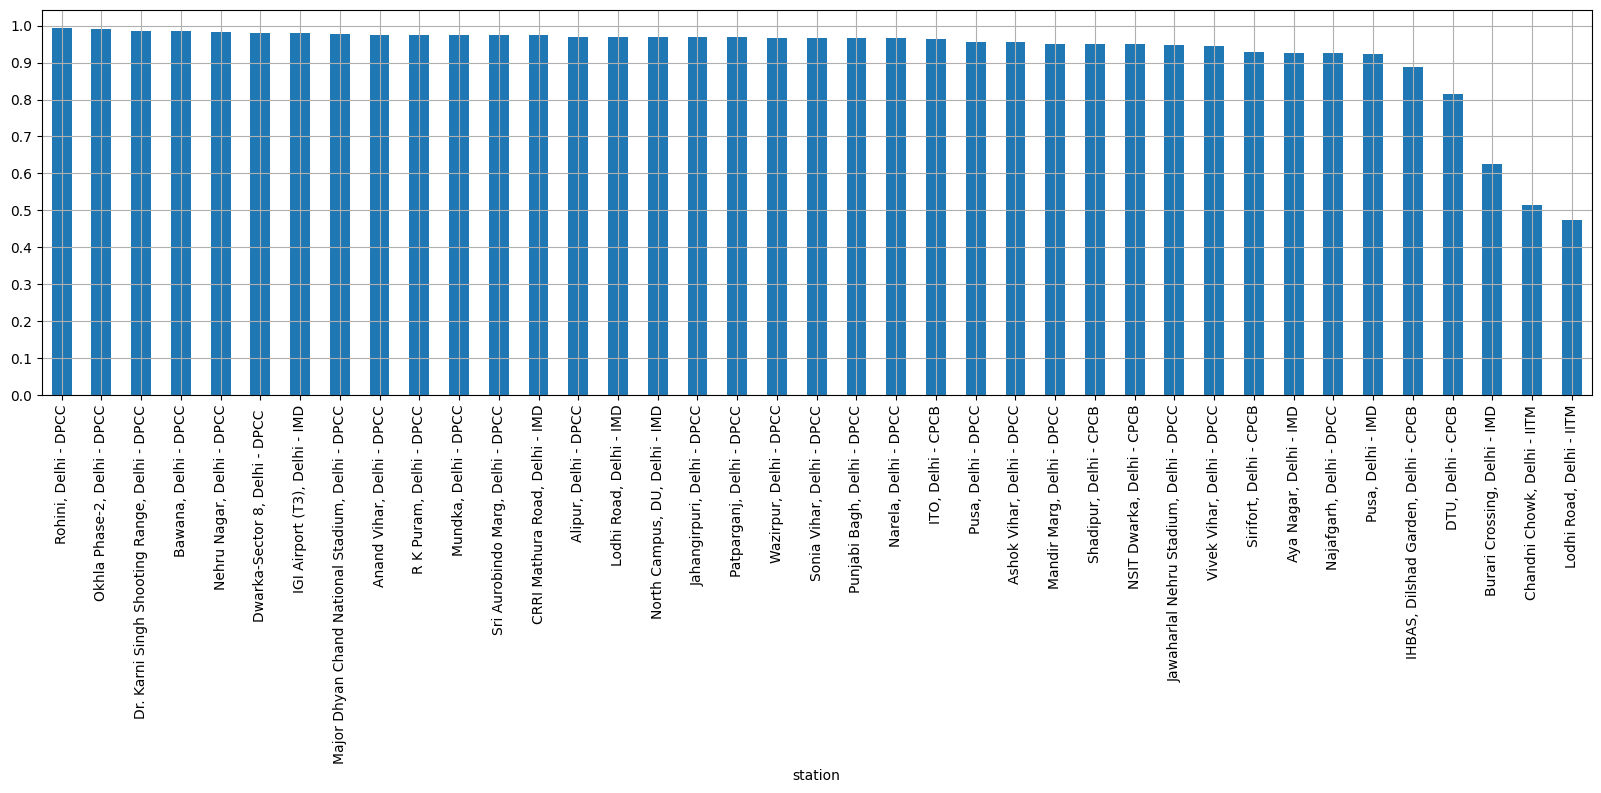

In [16]:
fraction_of_met_data = df.dropna(subset=["PM2.5", 'relative_humidity',
       'wind_speed', 'wind_direction', 'solar_radiation', 'pressure',
       'temperature', 'rain_fall', 'total_rainfall']).station.value_counts()/num_points_per_station
fraction_of_pm25_data.plot(kind="bar", figsize=(20, 5), grid=True, yticks=np.arange(0, 1.1, 0.1));

### Plot PM2.5 v/s a meteorological feature time-series for a random station

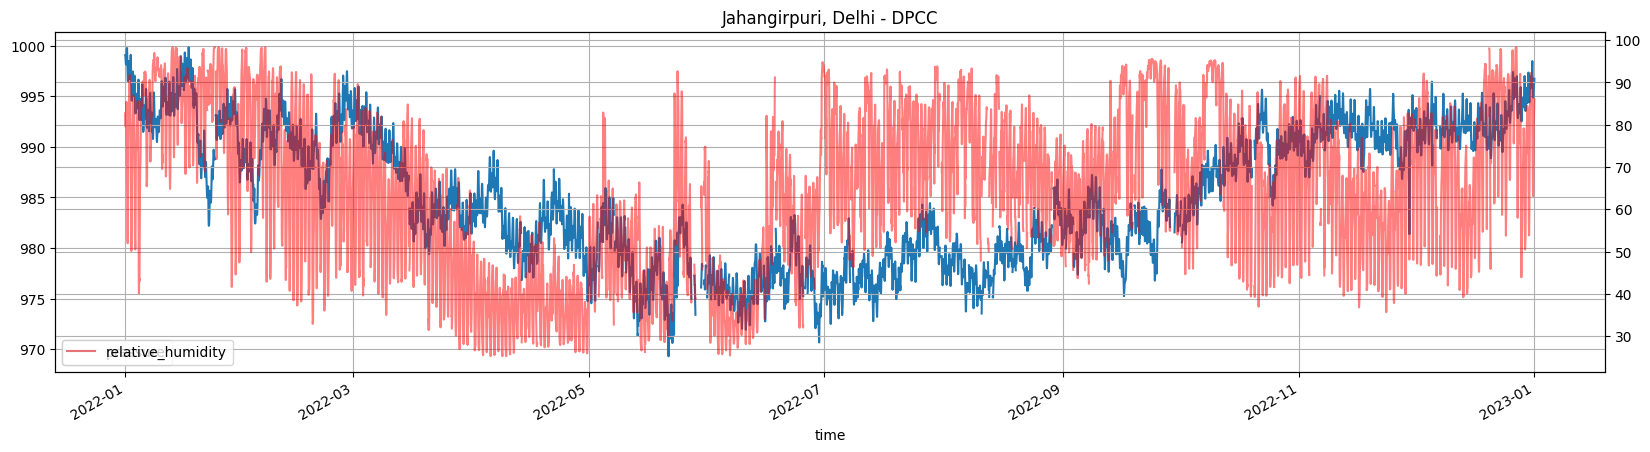

In [17]:
np.random.seed(2)
station = np.random.choice(df.station.unique())
station_df = df[df.station == station]

fig, ax = plt.subplots(figsize=(20, 5))
station_df["pressure"].plot(figsize=(20, 5), grid=True, ax=ax);
twin_ax = ax.twinx()
station_df["relative_humidity"].plot(figsize=(20, 5), grid=True, ax=twin_ax, color="red", alpha=0.5);
ax.set_title(station);
ax.legend();
twin_ax.legend();

In [18]:
station_df[["PM2.5", 'relative_humidity',
       'wind_speed', 'wind_direction', 'solar_radiation', 'pressure',
       'temperature']].corr().style.background_gradient(cmap='coolwarm')

,PM2.5,relative_humidity,wind_speed,wind_direction,solar_radiation,pressure,temperature
PM2.5,1.000000,0.228034,-0.389168,-0.060458,-0.264521,0.570978,-0.532048
relative_humidity,0.228034,1.000000,-0.156962,-0.207520,-0.434518,0.307618,-0.608594
wind_speed,-0.389168,-0.156962,1.000000,-0.006016,0.355926,-0.333636,0.306206
wind_direction,-0.060458,-0.207520,-0.006016,1.000000,0.117522,0.057706,0.040303
solar_radiation,-0.264521,-0.434518,0.355926,0.117522,1.000000,-0.184968,0.439358
pressure,0.570978,0.307618,-0.333636,0.057706,-0.184968,1.000000,-0.779530
temperature,-0.532048,-0.608594,0.306206,0.040303,0.439358,-0.779530,1.000000
